# Visualizing Coordinates on Page Images

This notebook provides with some functions that can be used to visualize the coordinates currently in the canonical data on the images of the newspaper pages. 
This can help ensure the coordinates are correctly scaled for the images that will be on the interface.

In [1]:
from bs4 import BeautifulSoup, element
import os
from text_preparation.importers.mets_alto import alto, mets
from text_preparation.importers.bl import classes, detect
from IPython.display import display
import cv2 as cv
from PIL import Image, ImageDraw, ImageFont
import json
import jsonlines
import git

/opt/homebrew/anaconda3/envs/text-acquisition-update/lib/python3.11/site-packages/python_jsonschema_objects/__init__.py:60: UserWarning: Schema version http://json-schema.org/draft-06/schema# not recognized. Some keywords and features may not be supported.
  warnings.warn(


## Functions

In [2]:
def coords_to_xy(coords):
    return [coords[0], coords[1], coords[0]+coords[2], coords[1]+coords[3]]

In [3]:
def draw_box_on_img(base_img_path, coords_xy, img = None, width=10):
    if not img:
        img = Image.open(base_img_path)  
    ImageDraw.Draw(img).rectangle(coords_xy, outline ="red", width=width)
    return img

In [4]:
def read_xml(file_path):
    with open(file_path, 'rb') as f:
        raw_xml = f.read()

    return BeautifulSoup(raw_xml, 'xml')

In [5]:
def read_json(file_path):
    lines = []
    with open(file_path, "r") as file:
        for line in file:
            lines.append(json.loads(line))
    return lines

In [6]:
def get_regions_for_ci(canonical_page, ci_id):
    return [r['c'] for r in canonical_page['r'] if 'pOf' in r.keys() and ci_id in r['pOf']]

In [7]:
def get_line_coords_for_ci(canonical_page, ci_id):
    return [l['c'] for r in canonical_page['r'] for p in r['p'] for l in p['l'] if 'pOf' in r.keys() and ci_id in r['pOf']]

In [8]:
def scale_coords(coords, curr_res, des_res):
    return [c*int(des_res)/int(curr_res) for c in coords]

### BL

In [ ]:
bl_path = '../text_importer/data/sample_data/BL'
issue_r_path = 'BLIP_20190929_04/0002244/1855/0922'
page_filename = '0002244_18550922_0001'
issue_mets_filename = '0002244_18550922_mets.xml'

mets_path = os.path.join(bl_path, issue_r_path, issue_mets_filename)
page_xml_path = os.path.join(bl_path, issue_r_path, f"{page_filename}.xml")
page_img_path = os.path.join(bl_path, issue_r_path, f"{page_filename}.jp2")

In [ ]:
mets_doc = read_xml(mets_path)
page_doc = read_xml(page_xml_path)

In [ ]:
ps = page_doc.find('PrintSpace')
block_coords = {}
for block in ps.children:

    if isinstance(block, element.NavigableString):
        continue
        
    id = block.get('ID')
    if 'P1' in id:
        coords = alto.distill_coordinates(block)
        coords_xy = [coords[0], coords[1], coords[0]+coords[2], coords[1]+coords[3]]
        block_coords[id] = coords_xy
block_coords

In [ ]:
def draw_rect_on_img(og_img, coords):
    img = ImageDraw.Draw(og_img)   
    img.rectangle(coords, outline ="red") 
    img.show()

In [ ]:
for id, coords in block_coords.items():
    print(f"Block with ID {id}, coords={coords}:")
    #draw_rect_on_img(img, coords)
    img = Image.open(page_img_path)
    img2 = ImageDraw.Draw(img)   
    img2.rectangle(coords, outline ="red", width=10) 
    t_coords =  (coords[0], coords[1] + 100)
    img2.text(t_coords, id, fill='red', font_size=100)
    img.show(title=f"{id}.PNG")

In [ ]:
id = "P1_CB00001"
coords = block_coords[id]
print(f"Block with ID {id}, coords={coords}:")
img = Image.open(page_img_path)
img2 = ImageDraw.Draw(img)   
img2.rectangle(coords, outline ="red", width=10) 
t_coords =  (coords[0], coords[1] + 100)
img2.text(t_coords, id, fill='red', font_size=100)
img.show(title=f"{id}.PNG")

In [ ]:
img = Image.open(page_img_path)
img.show()

In [ ]:


# importing image object from PIL 
import math 
from PIL import Image, ImageDraw 

w, h = 220, 190
shape = [(40, 40), (w - 10, h - 10)] 

# creating new Image object 
img = Image.new("RGB", (w, h)) 

# create rectangle image 
img1 = ImageDraw.Draw(img) 
img1.rectangle(shape, fill ="#ffff33", outline ="red") 
img.show() 


### KB

In [ ]:
kb_sample_data_path = '../text_importer/data/sample_data/KB'
kb_journal_path = os.path.join(kb_sample_data_path, '1876/12/01/DDD_ddd_010100993_mpeg21')
kb_img_path = os.path.join(kb_journal_path, 'DDD_010100993_001.jp2')

Check that the coordinates stored match with the image

In [ ]:
coords_1 = [163, 2239, 209, 33]
coords_xy_1 = coords_to_xy(coords_1)

In [ ]:
img_1 = Image.open(kb_img_path)  
ImageDraw.Draw(img_1).rectangle(coords_xy_1, outline ="red", width=10)
#display(img_1)

In [ ]:
binneland_coords = [302, 1833, 471, 40]
binneland_coords_xy = coords_to_xy(binneland_coords)

img_2 = Image.open(kb_img_path)  
ImageDraw.Draw(img_2).rectangle(binneland_coords_xy, outline ="red", width=10)
#display(img_2)

Page 2 - contains an illustration

In [ ]:
kb_img_path_2 = os.path.join(kb_journal_path, 'DDD_010100993_002.jp2')

In [ ]:
p2_coords = [103, 5979, 906, 38]
p2_xy_coords = coords_to_xy(p2_coords)

img_p2 = Image.open(kb_img_path_2)  
ImageDraw.Draw(img_p2).rectangle(p2_xy_coords, outline ="red", width=10)
#display(img_p2)

In [ ]:
block_coords = [59, 4525, 961, 2218]
block_xy_coords = coords_to_xy(block_coords)

block_coords_2 = [1042, 76, 967, 1583]
block_xy_coords_2 = coords_to_xy(block_coords_2)


img_p2_block = Image.open(kb_img_path_2)  
ImageDraw.Draw(img_p2_block).rectangle(block_xy_coords, outline ="red", width=10)
ImageDraw.Draw(img_p2_block).rectangle(block_xy_coords_2, outline ="red", width=10)
#display(img_p2_block)

# Check if coordinates are correct

In [9]:
base_path = "/Users/piconti/impresso/canonical_data_issues_eg/incorrect_coords"

### 1. RERO - Olive 

In [10]:
olive_eg_base_path = os.path.join(base_path, 'olive_rero', 'LBP-1888-12-29-a')
olive_eg_pg1_img_path = os.path.join(olive_eg_base_path, 'original/Document/1/Img')
olive_eg_pg1_img_high = os.path.join(olive_eg_pg1_img_path, 'Pg001_108.png')
olive_eg_pg1_img_mid = os.path.join(olive_eg_pg1_img_path, 'Pg001_60.png')
olive_eg_can_pages = os.path.join(olive_eg_base_path, 'canonical/LBP-1888-12-29-a-pages.jsonl')
jp2_img = os.path.join(olive_eg_base_path, 'LBP-1888-12-29-a-p0001.jp2')

In [11]:
dle_eg_base_path = os.path.join(base_path, 'olive_rero', 'DLE-1911-02-21-a')
dle_eg_can_pages = os.path.join(dle_eg_base_path, 'canonical', 'DLE-1911-02-21-a-pages.jsonl')
dle_eg_pg1_img_path = os.path.join('/Volumes/cdh_dhlab_2_arch/project_impresso/images', 'DLE-1911-02-21-a'.replace('-', '/'), 'DLE-1911-02-21-a-p0001.jp2')

In [ ]:
olive_eg_pages_json = read_json(olive_eg_can_pages)
olive_eg_pg1_cann = olive_eg_pages_json[0]
len(olive_eg_pages_json), olive_eg_pages_json

In [12]:
dle_eg_pages_json = read_json(dle_eg_can_pages)
lde_eg_pg1_cann = dle_eg_pages_json[0]

In [13]:
def get_regions_for_ci(canonical_page, ci_id):
    return [r['c'] for r in canonical_page['r'] if ci_id in r['pOf']]

In [14]:
def get_line_coords_for_ci(canonical_page, ci_id):
    return [l['c'] for r in canonical_page['r'] for p in r['p'] for l in p['l'] if ci_id in r['pOf']]

In [ ]:
olive_eg_region_i0004_coords = get_regions_for_ci(olive_eg_pg1_cann, 'i0004')
olive_eg_region_i0004_coords

In [15]:
def scale_coords(coords, curr_res, des_res):
    return [c*int(des_res)/int(curr_res) for c in coords]

In [ ]:
scaled_coords = scale_coords(olive_eg_region_i0004_coords[0], 108, 60)
scaled_coords

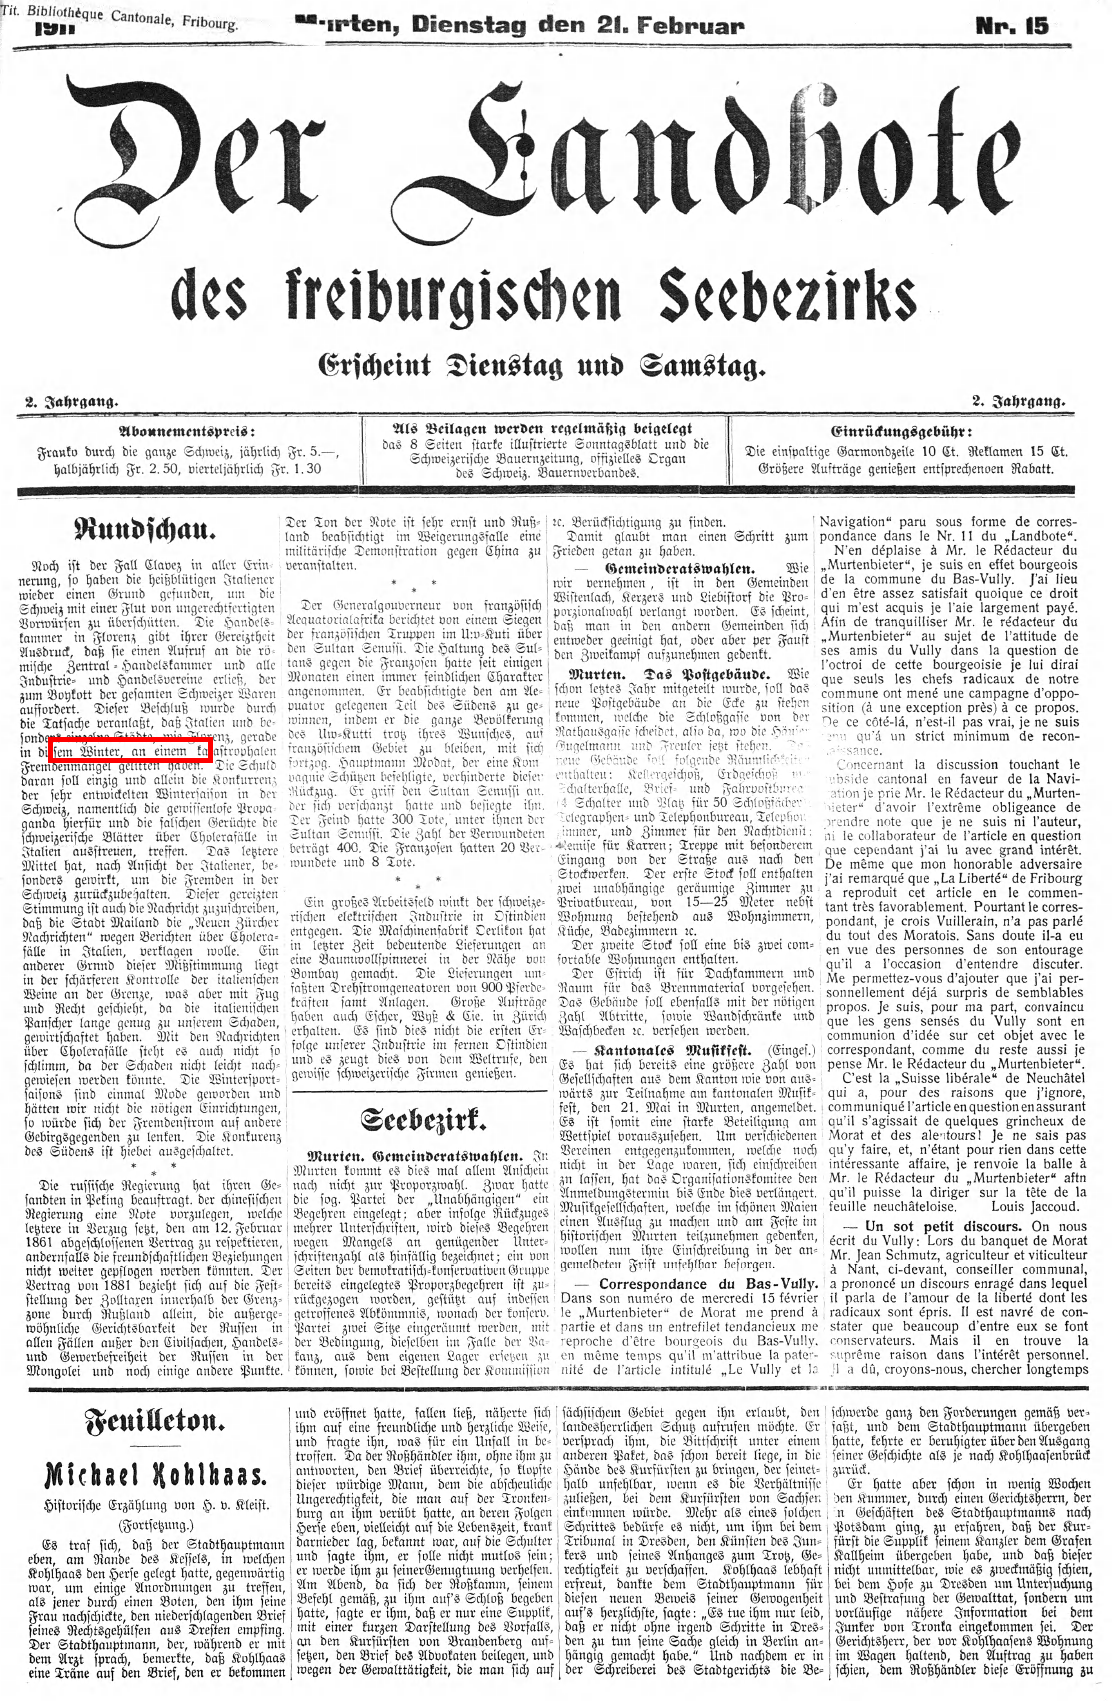

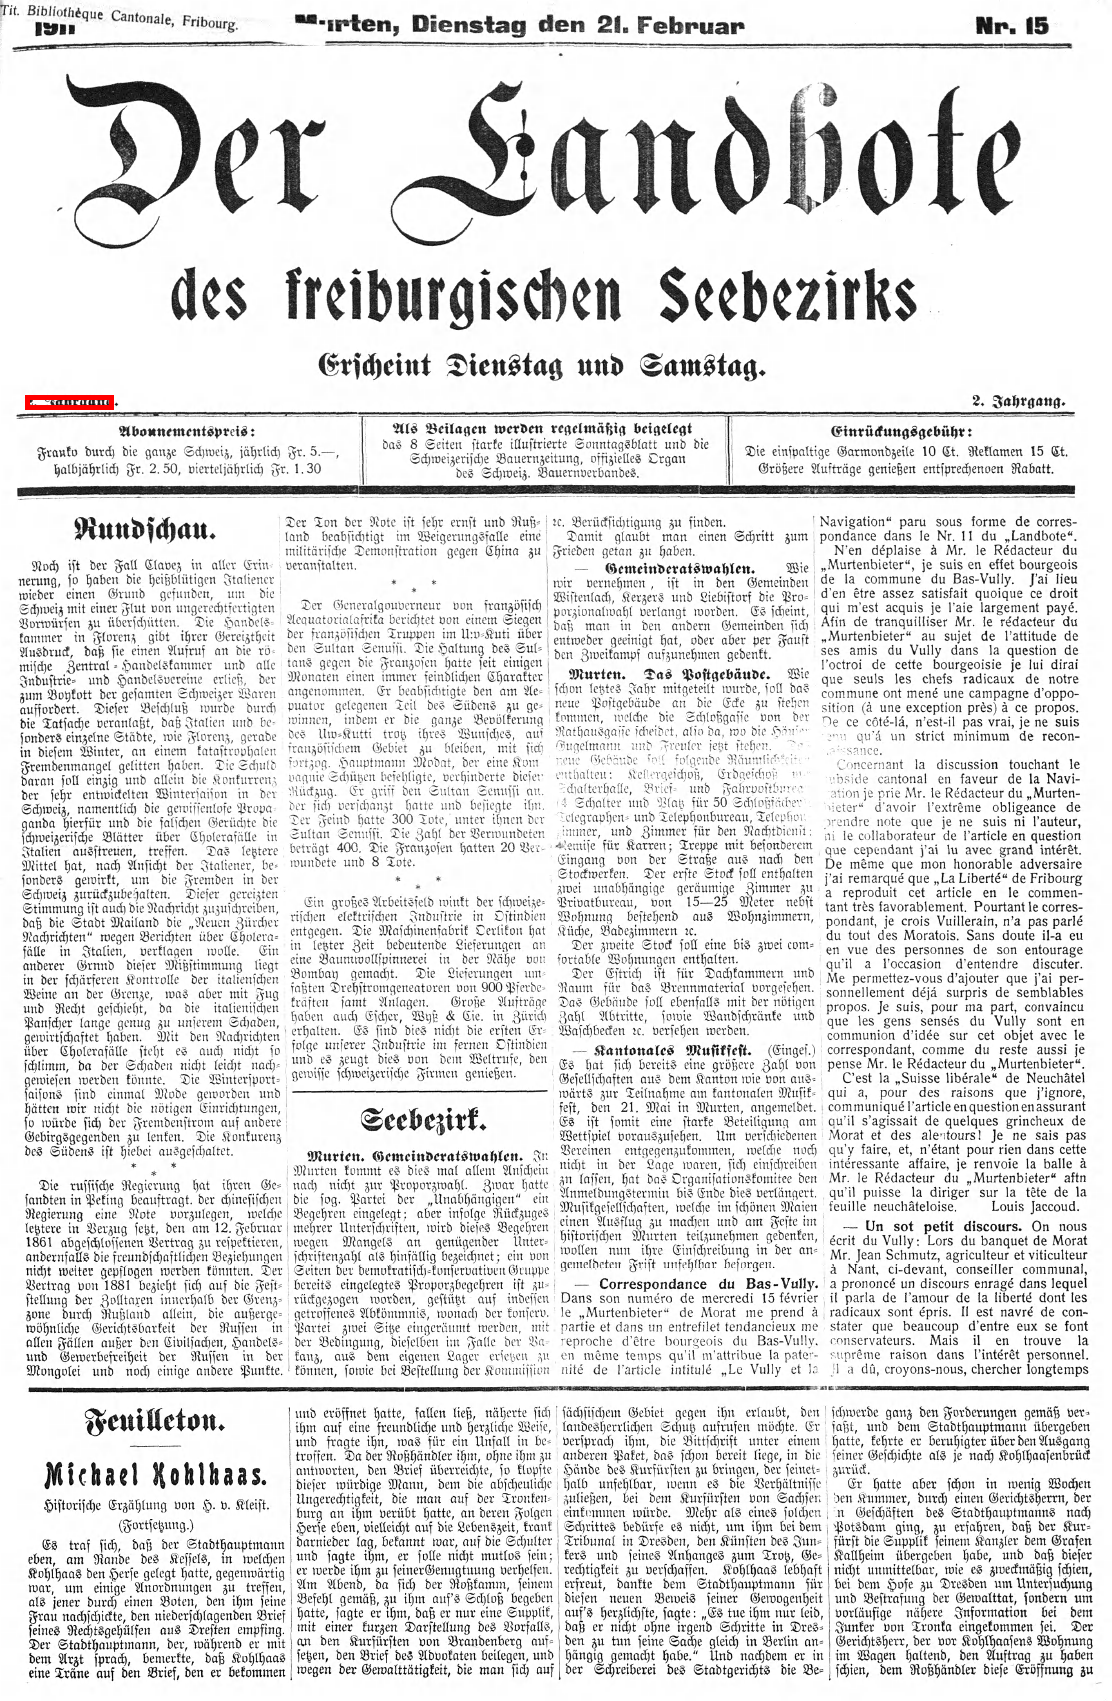

In [18]:
dle_eg_region_i2_coords = get_regions_for_ci(lde_eg_pg1_cann, 'i0002')

scaled_dle_eg_i2_c = [scale_coords(c, 108, 58) for c in dle_eg_region_i2_coords]
dle_eg_i2_coords_xy  = [coords_to_xy(c) for c in dle_eg_region_i2_coords]
scaled_eg_i2_coords_xy  = [coords_to_xy(c) for c in scaled_dle_eg_i2_c]

img, img_sc = None, None
for c_xy, scaled_c_xy in zip(dle_eg_i2_coords_xy, scaled_eg_i2_coords_xy):
    img = draw_box_on_img(dle_eg_pg1_img_path, c_xy, img, 5)
    img_sc = draw_box_on_img(dle_eg_pg1_img_path, scaled_c_xy, img_sc, 5)
display(img)
display(img_sc)

In [ ]:
scaled_coords_xy  = coords_to_xy(scaled_coords)
display(draw_box_on_img(jp2_img, scaled_coords_xy, width=5))

In [ ]:
s = "1/Img/Pg001_60.png"
os.path.splitext(s)[0].split("_")[-1]

In [ ]:
olive_eg_i0004_coords_xy  = coords_to_xy(olive_eg_region_i0004_coords)
display(draw_box_on_img(olive_eg_pg1_img_high, olive_eg_i0004_coords_xy))
display(draw_box_on_img(olive_eg_pg1_img_mid, olive_eg_i0004_coords_xy))

In [ ]:
olive_eg_region_2_coords = get_regions_for_ci(olive_eg_pg1_cann, 'i0005')
olive_eg_region_2_coords

In [ ]:
olive_eg_r1_coords_xy  = [coords_to_xy(c) for c in olive_eg_region_2_coords]
img_high, img_mid = None, None
for c_xy in olive_eg_r1_coords_xy:
    img_high = draw_box_on_img(olive_eg_pg1_img_high, c_xy, img_high)
    img_mid = draw_box_on_img(olive_eg_pg1_img_mid, c_xy, img_mid)
display(img_high)
display(img_mid)

In [ ]:
line_coords = get_line_coords_for_ci(olive_eg_pg1_cann, 'i0005')
line_coords

In [ ]:
olive_eg_line_coords_xy  = [coords_to_xy(c) for c in line_coords]
img_high, img_mid = None, None
for c_xy in olive_eg_line_coords_xy:
    img_high = draw_box_on_img(olive_eg_pg1_img_high, c_xy, img_high, width=8)
    img_mid = draw_box_on_img(olive_eg_pg1_img_mid, c_xy, img_mid, width=5)
display(img_high)
display(img_mid)

In [ ]:
scaled_coords = [scale_coords(c, 108, 60) for c in line_coords]
olive_eg_scaled_line_coords_xy  = [coords_to_xy(c) for c in scaled_coords]
img_jp2, img_mid = None, None
for c_xy in olive_eg_scaled_line_coords_xy:
    img_mid = draw_box_on_img(olive_eg_pg1_img_mid, c_xy, img_mid, width=5)
    img_jp2 = draw_box_on_img(jp2_img, c_xy, img_jp2, width=5)
display(img_jp2)
display(img_mid)

### 2. BNL

In [ ]:
bnl_eg_base_path = os.path.join(base_path, 'BNL', 'tageblatt-1950-11-21-a')
bnl_eg_imgs_path = os.path.join(bnl_eg_base_path, 'original/162372_newspaper_tageblatt_1950-11-21/images')
bnl_eg_pg1_img = os.path.join(bnl_eg_imgs_path, '1950-11-21_01-00001.tif')
bnl_eg_can_pages = os.path.join(bnl_eg_base_path, 'canonical/tageblatt-1950-11-21-a-pages.jsonl')
bnl_eg_pg1_img, bnl_eg_can_pages

In [ ]:
bnl_eg_pages_json = read_json(bnl_eg_can_pages)
bnl_eg_pg1_cann = bnl_eg_pages_json[0]
len(bnl_eg_pages_json)

In [ ]:
bnl_eg_pg1_cann

In [ ]:
bnl_eg_region_1_coords = get_regions_for_ci(bnl_eg_pg1_cann, 'i0039')
bnl_eg_region_1_coords

In [ ]:
bnl_eg_r1_coords_xy  = [coords_to_xy(c) for c in bnl_eg_region_1_coords]
img = None
for c_xy in bnl_eg_r1_coords_xy:
    img = draw_box_on_img(bnl_eg_pg1_img, c_xy, img)
#display(img)

In [ ]:
coords_first_art = [69, 881, 2153, 157]
coords_first_art_2 = [57, 1094, 698, 1673]
coords_xy_first_art  = [coords_to_xy(c) for c in [coords_first_art, coords_first_art_2]]
img = None
for c_xy in coords_xy_first_art:
    img = draw_box_on_img(bnl_eg_pg1_img, c_xy, img)
display(img)

### 3.RERO3

#### Example 1: FCT-1956-12-07-a

In [ ]:
# Example 1: FCT-1956-12-07-a
r3_fct_base_path = os.path.join(base_path, 'rero3', 'FCT-1956-12-07-a')

# original data path
r3_fct_original_path = os.path.join(r3_fct_base_path, 'original/19561207_01_049')
# Images
r3_fct_pg1_img_jp2 = os.path.join(r3_fct_original_path, 'MASTER/00001.jp2')
r3_fct_pg1_img_pdf = os.path.join(r3_fct_original_path, 'PAGEPDF/00001.jpg')

# canonical data path
r3_fct_can_pages = os.path.join(r3_fct_base_path, 'canonical/FCT-1956-12-07-a-pages.jsonl')

In [ ]:
r3_fct_pages_json = read_json(r3_fct_can_pages)
r3_fct_pg1_cann = r3_fct_pages_json[0]
len(r3_fct_pages_json), r3_fct_pages_json

In [ ]:
r3_fct_region7_coords = get_regions_for_ci(r3_fct_pg1_cann, 'i0007')
r3_fct_region7_coords

The coordinates are coorect in the canonical data, and would show correctly in the app too if the image was fetched with this link:
https://impresso-project.ch/api/proxy/iiif/FCT-1956-12-07-a-p0001/199,963,1267,179/full/0/default.jpg (for the title)

In [ ]:
r3_fct_region7_solr_coords =  [[169, 816, 1073, 152], [36, 1013, 678, 297], [39, 1333, 681, 673], [760, 1004, 678, 990]]

In [ ]:
r3_fct_region7_coords_xy  = [coords_to_xy(c) for c in r3_fct_region7_coords]
r3_fct_region7_solr_coords_xy  = [coords_to_xy(c) for c in r3_fct_region7_solr_coords]

img_jp2, img_solr = None, None
for c_xy, solr_xy in zip(r3_fct_region7_coords_xy, r3_fct_region7_solr_coords_xy):
    img_jp2 = draw_box_on_img(r3_fct_pg1_img_jp2, c_xy, img_jp2)
    img_solr = draw_box_on_img(r3_fct_pg1_img_jp2, solr_xy, img_solr)
    #img_pdf = draw_box_on_img(r3_fct_pg1_img_pdf, c_xy, img_pdf)
display(img_jp2)
display(img_solr)

#### Example 2: GAV-1877-09-05-a

In [ ]:
# Example 2: GAV-1877-09-05-a
r3_gav_base_path = os.path.join(base_path, 'rero3', 'GAV-1877-09-05-a')

# original data path
r3_gav_original_path = os.path.join(r3_gav_base_path, 'original/18770905_01')
# Images
r3_gav_pg1_img_jp2 = os.path.join(r3_gav_original_path, 'MASTER/00001.jp2')

# canonical data path
r3_gav_can_pages = os.path.join(r3_gav_base_path, 'canonical/GAV-1877-09-05-a-pages.jsonl')

In [ ]:
r3_gav_pages_json = read_json(r3_gav_can_pages)
r3_gav_pg1_cann = r3_gav_pages_json[0]
r3_gav_region11_coords = get_regions_for_ci(r3_gav_pg1_cann, 'i0011')
r3_gav_region11_coords

In [ ]:
r3_gav_region7_coords_xy  = [coords_to_xy(c) for c in r3_gav_region11_coords]

img_jp2 = None
for c_xy in r3_gav_region7_coords_xy:
    img_jp2 = draw_box_on_img(r3_gav_pg1_img_jp2, c_xy, img_jp2)
display(img_jp2)

#### Example 3: OIZ-1963-06-13-a

In [ ]:
# Example 2: OIZ-1963-06-13-a
r3_oiz_base_path = os.path.join(base_path, 'rero3', 'OIZ-1963-06-13-a')

# original data path
r3_oiz_original_path = os.path.join(r3_oiz_base_path, 'original/19630613_01_024')
# Images
r3_oiz_pg1_img_jp2 = os.path.join(r3_oiz_original_path, 'MASTER/00001.jp2')

# canonical data path
r3_oiz_can_pages = os.path.join(r3_oiz_base_path, 'canonical/OIZ-1963-06-13-a-pages.jsonl')

In [ ]:
r3_oiz_pages_json = read_json(r3_oiz_can_pages)
r3_oiz_pg1_cann = r3_oiz_pages_json[0]
r3_oiz_region1_coords = get_regions_for_ci(r3_oiz_pg1_cann, 'i0001')
r3_oiz_region1_coords

In [ ]:
r3_oiz_region7_coords_xy  = [coords_to_xy(c) for c in r3_oiz_region1_coords]

img_jp2 = None
for c_xy in r3_oiz_region7_coords_xy:
    img_jp2 = draw_box_on_img(r3_oiz_pg1_img_jp2, c_xy, img_jp2)
display(img_jp2)